In [1]:
from tqdm import tqdm
from utils import read_json_file, get_all_text

In [2]:
reviews=read_json_file('../data/reviews.json')
print(reviews.keys())

dict_keys(['data', 'meta'])


In [3]:
texts = get_all_text(reviews['data'])
print(f"No of Texts: {len(texts)}")

100%|██████████| 855/855 [00:00<00:00, 512450.69it/s]

No of Texts: 5242


In [4]:
import spacy

In [5]:
nlp = spacy.load("en_core_web_md")

In [8]:
docs =  []
for text in texts:
    if text:
        docs.append(nlp(text))

In [12]:
len(docs)

3286

In [17]:
from collections import defaultdict
def get_freq_noun_all_text(docs):

    freq_nouns=defaultdict(int)

    for doc in docs:
        for token in doc:
            if not (token.is_stop or token.is_punct) and token.pos_=="NOUN":
                freq_nouns[token.lemma_]+=1
    
    return freq_nouns

freq_nouns=get_freq_noun_all_text(docs)

In [24]:
sorted_nouns_by_freq = sorted(freq_nouns.items(), key = lambda x:x[1], reverse = True)

In [28]:
sorted_nouns_by_freq[:25]

[('trip', 1079),
 ('service', 993),
 ('guide', 968),
 ('experience', 909),
 ('trek', 881),
 ('travel', 702),
 ('tour', 694),
 ('company', 584),
 ('day', 548),
 ('time', 509),
 ('agency', 475),
 ('team', 452),
 ('thank', 316),
 ('trekking', 279),
 ('adventure', 253),
 ('journey', 247),
 ('place', 236),
 ('porter', 235),
 ('care', 232),
 ('flight', 218),
 ('way', 217),
 ('staff', 216),
 ('hotel', 203),
 ('ticket', 191),
 ('mountain', 184)]

In [34]:
subject, frequency = zip(*sorted_nouns_by_freq)

In [29]:
import matplotlib.pyplot as plt

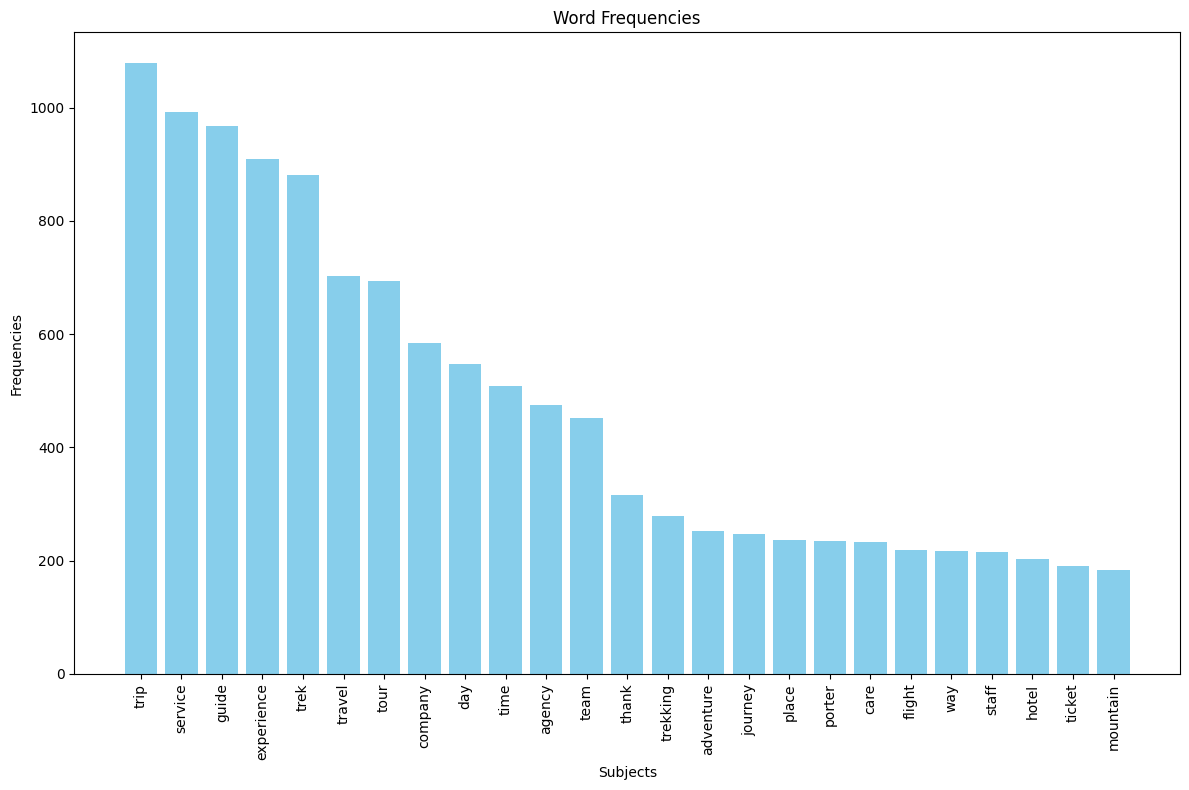

In [37]:

plt.figure(figsize=(12, 8))
plt.bar(subject[:25], frequency[:25], color='skyblue')
plt.xlabel('Subjects')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')
plt.xticks(rotation=90)  
plt.tight_layout()


plt.show()